In [1]:
!pip install plotly --upgrade

     |████████████████████████████████| 15.2 MB 18.4 MB/s eta 0:00:01
  Attempting uninstall: plotly
    Found existing installation: plotly 5.6.0
    Uninstalling plotly-5.6.0:
      Successfully uninstalled plotly-5.6.0


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [5]:
base_credit = pd.read_csv('/Users/augustoscafi/Desktop/Python_Testes/credit_data.csv')

In [7]:
base_credit.head()

clientid        income        age         loan  default
0         1  66155.925095  59.017015  8106.532131        0
1         2  34415.153966  48.117153  6564.745018        0
2         3  57317.170063  63.108049  8020.953296        0
3         4  42709.534201  45.751972  6103.642260        0
4         5  66952.688845  18.584336  8770.099235        1

In [8]:
base_credit.tail(8)

clientid        income        age         loan  default
1992      1993  30803.806165  23.250084   623.024153        0
1993      1994  54421.410155  26.821928  3273.631823        0
1994      1995  24254.700791  37.751622  2225.284643        0
1995      1996  59221.044874  48.518179  1926.729397        0
1996      1997  69516.127573  23.162104  3503.176156        0
1997      1998  44311.449262  28.017167  5522.786693        1
1998      1999  43756.056605  63.971796  1622.722598        0
1999      2000  69436.579552  56.152617  7378.833599        0

In [9]:
base_credit.describe()

clientid        income          age          loan      default
count  2000.000000   2000.000000  1997.000000   2000.000000  2000.000000
mean   1000.500000  45331.600018    40.807559   4444.369695     0.141500
std     577.494589  14326.327119    13.624469   3045.410024     0.348624
min       1.000000  20014.489470   -52.423280      1.377630     0.000000
25%     500.750000  32796.459717    28.990415   1939.708847     0.000000
50%    1000.500000  45789.117313    41.317159   3974.719419     0.000000
75%    1500.250000  57791.281668    52.587040   6432.410625     0.000000
max    2000.000000  69995.685578    63.971796  13766.051239     1.000000

In [11]:
#Cliente com a maior base salarial
base_credit[base_credit['income'] >= 69995.685578]

clientid        income        age         loan  default
422       423  69995.685578  52.719673  2084.370861        0

In [20]:
#Cliente com a menor divida de emprestimo
base_credit[base_credit['loan'] <= 1.377630]

clientid        income        age     loan  default
865       866  28072.604355  54.142548  1.37763        0

# Visualização dos dados

In [23]:
#Visualizar quais valores unicos que tenho na coluna default
np.unique(base_credit['default'])

array([0, 1])

In [35]:
#Cliente com a maior divida de emprestimo
base_credit[base_credit['loan'] >= 13755.000000]

clientid        income        age          loan  default
1378      1379  69755.320163  44.543682  13766.051239        0

In [34]:
#Cliente com a menor base salarial
base_credit[base_credit['income'] <= 20015.000000]

clientid       income        age         loan  default
1452      1453  20014.48947  43.202204  2426.306223        0

In [26]:
#Adicionando o parâmetro return_counts=True vai me retornar quantos tenho que pagaram e quantos não pagaram
np.unique(base_credit['default'], return_counts=True)

(array([0, 1]), array([1717,  283]))

<AxesSubplot:xlabel='default', ylabel='count'>

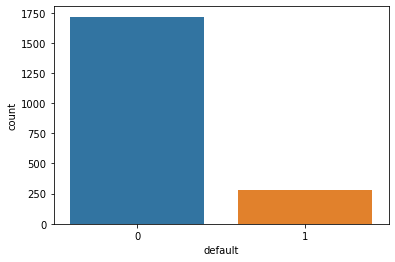

In [27]:
sns.countplot(x = base_credit['default'])

(array([  1.,   1.,   1.,   0.,   0.,   0., 499., 467., 514., 514.]),
 array([-52.42327992, -40.78377234, -29.14426477, -17.50475719,
         -5.86524962,   5.77425796,  17.41376554,  29.05327311,
         40.69278069,  52.33228827,  63.97179584]),
 <BarContainer object of 10 artists>)

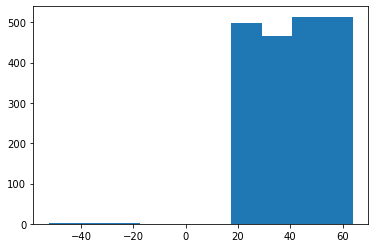

In [28]:
plt.hist(x = base_credit['age'])

(array([189., 198., 199., 179., 204., 209., 206., 199., 219., 198.]),
 array([20014.48947005, 25012.60908088, 30010.7286917 , 35008.84830253,
        40006.96791336, 45005.08752419, 50003.20713501, 55001.32674584,
        59999.44635667, 64997.5659675 , 69995.68557832]),
 <BarContainer object of 10 artists>)

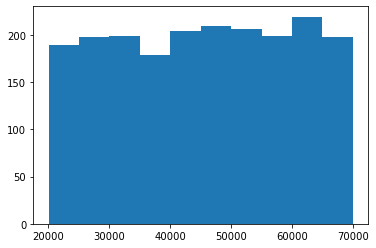

In [29]:
plt.hist(x = base_credit['income'])

(array([345., 373., 318., 277., 266., 171., 104.,  89.,  40.,  17.]),
 array([1.37762959e+00, 1.37784499e+03, 2.75431235e+03, 4.13077971e+03,
        5.50724707e+03, 6.88371443e+03, 8.26018180e+03, 9.63664916e+03,
        1.10131165e+04, 1.23895839e+04, 1.37660512e+04]),
 <BarContainer object of 10 artists>)

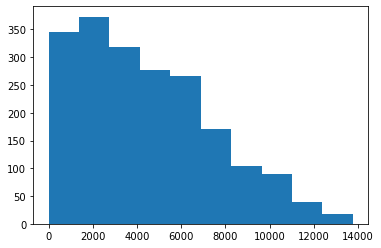

In [36]:
plt.hist(x=base_credit['loan'])

In [39]:
#Grafico de dispersão
grafico = px.scatter_matrix(base_credit, ['age', 'income', 'loan'], color='default')
grafico.show()

# Tratamento dos dados

In [40]:
#Indicando todos as idades negativas
base_credit.loc[base_credit['age'] <= 0]

clientid        income        age         loan  default
15        16  50501.726689 -28.218361  3977.287432        0
21        22  32197.620701 -52.423280  4244.057136        0
26        27  63287.038908 -36.496976  9595.286289        0

In [46]:
#Apagando os registros que estão negativos
#o .index vai indicar os index dentro da base_credit['age']<0.index 
#que vão ser excluídos ( no caso index 15, 21 e 26)
base_credit2 = base_credit.drop(base_credit[base_credit['age'] < 0].index)
base_credit2

clientid        income        age         loan  default
0            1  66155.925095  59.017015  8106.532131        0
1            2  34415.153966  48.117153  6564.745018        0
2            3  57317.170063  63.108049  8020.953296        0
3            4  42709.534201  45.751972  6103.642260        0
4            5  66952.688845  18.584336  8770.099235        1
...        ...           ...        ...          ...      ...
1995      1996  59221.044874  48.518179  1926.729397        0
1996      1997  69516.127573  23.162104  3503.176156        0
1997      1998  44311.449262  28.017167  5522.786693        1
1998      1999  43756.056605  63.971796  1622.722598        0
1999      2000  69436.579552  56.152617  7378.833599        0

[1997 rows x 5 columns]

In [50]:
base_credit['age'].mean()

40.80755937840458

In [52]:
base_credit['age'][base_credit['age'] > 0].mean()

40.92770044906149

In [53]:
#Agora a maneira correta, sem excluir dados

base_credit.loc[base_credit['age'] < 0, 'age'] = 40.927700

In [54]:
base_credit.head(27)

clientid        income        age         loan  default
0          1  66155.925095  59.017015  8106.532131        0
1          2  34415.153966  48.117153  6564.745018        0
2          3  57317.170063  63.108049  8020.953296        0
3          4  42709.534201  45.751972  6103.642260        0
4          5  66952.688845  18.584336  8770.099235        1
5          6  24904.064140  57.471607    15.498598        0
6          7  48430.359613  26.809132  5722.581981        0
7          8  24500.141984  32.897548  2971.003310        1
8          9  40654.892537  55.496853  4755.825280        0
9         10  25075.872771  39.776378  1409.230371        0
10        11  64131.415372  25.679575  4351.028971        0
11        12  59436.847123  60.471936  9254.244538        0
12        13  61050.346079  26.355044  5893.264659        0
13        14  27267.995458  61.576776  4759.787581        0
14        15  63061.960174  39.201553  1850.369377        0
15        16  50501.726689  40.927700  3977.287432        0
16        17  43548.654711  39.574530  3935.544453        0
17        18  43378.175194  60.848318  3277.737553        0
18        19  20542.365073  61.690571  3157.442290        0
19        20  58887.357549  26.076093  4965.516066        0
20        21  23000.784002  31.761354  1148.118057        0
21        22  32197.620701  40.927700  4244.057136        0
22        23  23329.319414  48.576975   222.622299        0
23        24  27845.800894  51.970624  4959.921226        0
24        25  65301.984029  48.840922  5465.267886        0
25        26  47451.630123  27.031741  5361.282716        0
26        27  63287.038908  40.927700  9595.286289        0

In [57]:
base_credit['age'].loc[base_credit['age'] == 40.927700]

15    40.9277
21    40.9277
26    40.9277
Name: age, dtype: float64

In [58]:
#Com as idades tratadas, agora podemos visualizar melhor o gráfico 
grafico = px.scatter_matrix(base_credit, ['age', 'income', 'loan'], color='default')
grafico.show()

In [59]:
#Encontrando dados nulls

base_credit.isnull()

clientid  income    age   loan  default
0        False   False  False  False    False
1        False   False  False  False    False
2        False   False  False  False    False
3        False   False  False  False    False
4        False   False  False  False    False
...        ...     ...    ...    ...      ...
1995     False   False  False  False    False
1996     False   False  False  False    False
1997     False   False  False  False    False
1998     False   False  False  False    False
1999     False   False  False  False    False

[2000 rows x 5 columns]

In [61]:
base_credit.isnull().sum()

clientid    0
income      0
age         3
loan        0
default     0
dtype: int64

In [62]:
base_credit.loc[pd.isnull(base_credit['age'])]

clientid        income  age         loan  default
28        29  59417.805406  NaN  2082.625938        0
30        31  48528.852796  NaN  6155.784670        0
31        32  23526.302555  NaN  2862.010139        0

In [66]:
#Alterando os valores NULL(NAN) para os valores da média de idade conforme feito antes
#Para isso vamos utilizar o seguinte comando
base_credit['age'].fillna(base_credit['age'].mean(), inplace=True)

#a função .fillna() vai substituir os valores NaN por outros conforme passando o parametro inplace=True, se não
#vai ficar somente na memoria e não vai ser executado

In [68]:
#para verificar o que foi feito vamos utilizar o seguinte:

base_credit.loc[base_credit['clientid'].isin([29,31,32])]

clientid        income      age         loan  default
28        29  59417.805406  40.9277  2082.625938        0
30        31  48528.852796  40.9277  6155.784670        0
31        32  23526.302555  40.9277  2862.010139        0

# Divisão entre previsores e classe

In [69]:
#Variaveis PREVISORA é X
#O primeiro parâmetro do .iloc é a quantidade de linha que quero passar, no caso todas [:,]
#O segundo parâmetro vai indicar quais colunas 
#O .values indica que vai converter em formato numpy
x_credit = base_credit.iloc[:, 1:4].values 
x_credit

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [70]:
#Variaveis CLASSE de Y 
y_credit = base_credit.iloc[:, 4].values
y_credit

array([0, 0, 0, ..., 1, 0, 0])

# Escalonamento dos Atributos

In [74]:
#Para saber o menor salario do income, utilizamos no segundo parâmetro o 0 do income.
#A segunda para saber a menor idade
#A menor divida
x_credit[:, 0].min(), x_credit[:, 1].min(), x_credit[:, 2].min()

(20014.4894700497, 18.055188510566897, 1.37762959325451)

In [75]:
#Para saber o maior salario do income
#A segunda para saber a maior idade
#A maior divida
x_credit[:, 0].max(), x_credit[:, 1].max(), x_credit[:, 2].max()

(69995.6855783239, 63.971795841120205, 13766.0512393337)

In [76]:
from sklearn.preprocessing import StandardScaler
scaler_credit = StandardScaler()
x_credit = scaler_credit.fit_transform(x_credit)

In [77]:
x_credit[:, 0].min(), x_credit[:, 1].min(), x_credit[:, 2].min()

(-1.7676158019964077, -1.7264154144285095, -1.4592791099462408)

In [78]:
x_credit[:, 0].max(), x_credit[:, 1].max(), x_credit[:, 2].max()

(1.7220222385319197, 1.739366520202487, 3.0616609141708273)

In [79]:
#Agora temos os valores escalonados
x_credit

array([[ 1.45393393,  1.36538005,  1.20281942],
       [-0.76217555,  0.54265932,  0.69642695],
       [ 0.83682073,  1.67417101,  1.17471147],
       ...,
       [-0.07122592, -0.97448606,  0.35420081],
       [-0.11000289,  1.73936652, -0.92675625],
       [ 1.682986  ,  1.14917551,  0.96381038]])

# Lendo uma nova base de dados

In [80]:
base_census = pd.read_csv('/Users/augustoscafi/Desktop/Python_Testes/census.csv')
base_census

age          workclass  final-weight    education  education-num  \
0       39          State-gov         77516    Bachelors             13   
1       50   Self-emp-not-inc         83311    Bachelors             13   
2       38            Private        215646      HS-grad              9   
3       53            Private        234721         11th              7   
4       28            Private        338409    Bachelors             13   
...    ...                ...           ...          ...            ...   
32556   27            Private        257302   Assoc-acdm             12   
32557   40            Private        154374      HS-grad              9   
32558   58            Private        151910      HS-grad              9   
32559   22            Private        201490      HS-grad              9   
32560   52       Self-emp-inc        287927      HS-grad              9   

            marital-status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spouse     Exec-managerial         Husband   White   
2                 Divorced   Handlers-cleaners   Not-in-family   White   
3       Married-civ-spouse   Handlers-cleaners         Husband   Black   
4       Married-civ-spouse      Prof-specialty            Wife   Black   
...                    ...                 ...             ...     ...   
32556   Married-civ-spouse        Tech-support            Wife   White   
32557   Married-civ-spouse   Machine-op-inspct         Husband   White   
32558              Widowed        Adm-clerical       Unmarried   White   
32559        Never-married        Adm-clerical       Own-child   White   
32560   Married-civ-spouse     Exec-managerial            Wife   White   

           sex  capital-gain  capital-loos  hour-per-week  native-country  \
0         Male          2174             0             40   United-States   
1         Male             0             0             13   United-States   
2         Male             0             0             40   United-States   
3         Male             0             0             40   United-States   
4       Female             0             0             40            Cuba   
...        ...           ...           ...            ...             ...   
32556   Female             0             0             38   United-States   
32557     Male             0             0             40   United-States   
32558   Female             0             0             40   United-States   
32559     Male             0             0             20   United-States   
32560   Female         15024             0             40   United-States   

       income  
0       <=50K  
1       <=50K  
2       <=50K  
3       <=50K  
4       <=50K  
...       ...  
32556   <=50K  
32557    >50K  
32558   <=50K  
32559   <=50K  
32560    >50K  

[32561 rows x 15 columns]

In [81]:
base_census.describe()

age  final-weight  education-num  capital-gain  capital-loos  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hour-per-week  
count   32561.000000  
mean       40.437456  
std        12.347429  
min         1.000000  
25%        40.000000  
50%        40.000000  
75%        45.000000  
max        99.000000

In [82]:
base_census.isnull().sum()

age               0
workclass         0
final-weight      0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loos      0
hour-per-week     0
native-country    0
income            0
dtype: int64

# Visualização de Dados

In [83]:
np.unique(base_census['income'], return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841]))

<AxesSubplot:xlabel='income', ylabel='count'>

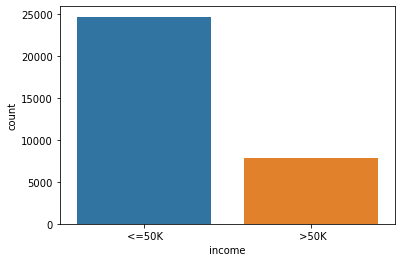

In [85]:
sns.countplot(x = base_census['income'])

(array([5570., 5890., 6048., 6163., 3967., 2591., 1595.,  496.,  174.,
          67.]),
 array([17. , 24.3, 31.6, 38.9, 46.2, 53.5, 60.8, 68.1, 75.4, 82.7, 90. ]),
 <BarContainer object of 10 artists>)

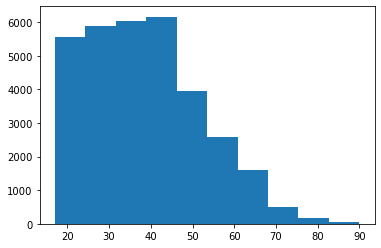

In [86]:
plt.hist(x=base_census['age'])

(array([  219.,   333.,  1160.,   933.,  1608., 10501.,  8673.,  1067.,
         7078.,   989.]),
 array([ 1. ,  2.5,  4. ,  5.5,  7. ,  8.5, 10. , 11.5, 13. , 14.5, 16. ]),
 <BarContainer object of 10 artists>)

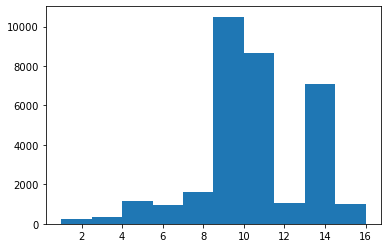

In [87]:
plt.hist(x=base_census['education-num'])

(array([  736.,  2192.,  2317., 17735.,  3119.,  3877.,  1796.,   448.,
          202.,   139.]),
 array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ]),
 <BarContainer object of 10 artists>)

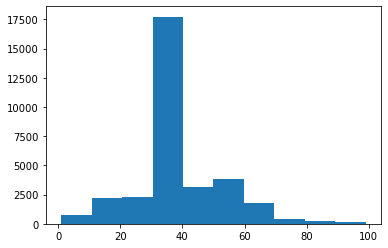

In [89]:
plt.hist(x=base_census['hour-per-week'])

In [91]:
grafico = px.treemap(base_census, path=['workclass', 'age'])
grafico.show()

In [92]:
grafico = px.treemap(base_census, path=['education', 'occupation', 'relationship'])
grafico.show()

In [93]:
grafico2 = px.parallel_categories(base_census, dimensions=['occupation','relationship'])
grafico2.show()

In [95]:
grafico2 = px.parallel_categories(base_census, dimensions=['education', 'income'])
grafico2.show()

In [96]:
x_census = base_census.iloc[:, 0:14].values
x_census

array([[39, ' State-gov', 77516, ..., 0, 40, ' United-States'],
       [50, ' Self-emp-not-inc', 83311, ..., 0, 13, ' United-States'],
       [38, ' Private', 215646, ..., 0, 40, ' United-States'],
       ...,
       [58, ' Private', 151910, ..., 0, 40, ' United-States'],
       [22, ' Private', 201490, ..., 0, 20, ' United-States'],
       [52, ' Self-emp-inc', 287927, ..., 0, 40, ' United-States']],
      dtype=object)

In [97]:
y_census = base_census.iloc[:, 14].values
y_census

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

# Label Encoder

É para transformar as strings em númericos

In [99]:
from sklearn.preprocessing import LabelEncoder

In [100]:
label_encoder_teste = LabelEncoder()

In [102]:
x_census[:,1]

array([' State-gov', ' Self-emp-not-inc', ' Private', ..., ' Private',
       ' Private', ' Self-emp-inc'], dtype=object)

In [105]:
teste = label_encoder_teste.fit_transform(x_census[:, 1])
#Preste atenção que cada um dos atributos dentro da 'workclass' agora é um número único
teste

array([7, 6, 4, ..., 4, 4, 5])

In [106]:
label_encoder_workclass = LabelEncoder()
label_encoder_education = LabelEncoder()
label_encoder_marital = LabelEncoder()
label_encoder_occupation = LabelEncoder()
label_encoder_relationship = LabelEncoder()
label_encoder_race = LabelEncoder()
label_encoder_sex = LabelEncoder()
label_encoder_country = LabelEncoder()

In [107]:
x_census[:,1] = label_encoder_workclass.fit_transform(x_census[:,1])
x_census[:,3] = label_encoder_education.fit_transform(x_census[:,3])
x_census[:,5] = label_encoder_marital.fit_transform(x_census[:,5])
x_census[:,6] = label_encoder_occupation.fit_transform(x_census[:,6])
x_census[:,7] = label_encoder_relationship.fit_transform(x_census[:,7])
x_census[:,8] = label_encoder_race.fit_transform(x_census[:,8])
x_census[:,9] = label_encoder_sex.fit_transform(x_census[:,9])
x_census[:,13] = label_encoder_country.fit_transform(x_census[:,13])

In [109]:
x_census[0]

array([39, 7, 77516, 9, 13, 4, 1, 1, 4, 1, 2174, 0, 40, 39], dtype=object)

Um dos problemas de se usar somente o LabelEncoder que podemos ter muitas categorias e valores vão ser diferentes.

In [111]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [113]:
onehotencoder_census = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [1, 3, 5, 6, 7, 8, 9, 13])],
                                         remainder='passthrough')

In [114]:
x_census = onehotencoder_census.fit_transform(x_census).toarray()

In [115]:
x_census

array([[0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 2.1740e+03, 0.0000e+00,
        4.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.3000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        4.0000e+01],
       ...,
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        4.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        2.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.5024e+04, 0.0000e+00,
        4.0000e+01]])

In [116]:
x_census[0]

array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e

In [118]:
x_census.shape

(32561, 108)

# Escalonamento dos Valores

In [119]:
from sklearn.preprocessing import StandardScaler
scaler_census = StandardScaler()
x_census = scaler_census.fit_transform(x_census)

In [120]:
x_census[0]

array([-0.2444502 , -0.17429511, -0.26209736, -0.01466381, -1.5167923 ,
       -0.18838933, -0.29093568,  4.90769968, -0.02073999, -0.17175325,
       -0.19348662, -0.11609195, -0.07201601, -0.10164955, -0.1422718 ,
       -0.12664495, -0.18406376, -0.21053433,  2.25399324, -0.11334387,
       -0.68994199, -0.23637391, -0.03960742, -0.13419553, -0.53714425,
       -0.39750806, -0.02658695, -0.92284068, -0.11403678,  1.43105786,
       -0.1802846 , -0.17735813, -0.24494366,  2.76348874, -0.01662771,
       -0.37949517, -0.37774555, -0.17745022, -0.20957797, -0.25595432,
       -0.33554133, -0.06780164, -0.38166338, -0.14260848, -0.35531609,
       -0.17127887, -0.22710355, -0.82533335,  1.70899099, -0.17624972,
       -0.42934582, -0.34403232, -0.22492681, -0.09820087, -0.18155194,
       -0.32576824, -0.09161163,  0.4130197 , -0.70307135,  0.70307135,
       -0.13502327, -0.02416321, -0.06107342, -0.0480488 , -0.04260602,
       -0.05409379, -0.04641598, -0.02933708, -0.05714946, -0.05

# Divisão das bases em treinamento e teste

In [121]:
#importação da biblioteca sklearn 

from sklearn.model_selection import train_test_split

In [122]:
# Credit Base
x_credit_treinamento, x_credit_teste, y_credit_treinamento, y_credit_teste = train_test_split(x_credit, y_credit, test_size = 0.25, random_state = 0)

In [123]:
# verificação dos valores do x e y 
x_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [125]:
#Lembrando que ambos tem que estar com o mesmo valor, ex: 500 no x e y, 1500 no x e no y
x_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

In [129]:
# Census base
x_census_treinamento, x_census_teste, y_census_treinamento, y_census_teste = train_test_split(x_census, y_census, test_size = 0.15, random_state = 0)

In [131]:
x_census_treinamento.shape, y_census_treinamento.shape

((27676, 108), (27676,))

In [133]:
x_census_teste.shape, y_census_teste.shape

((4885, 108), (4885,))

# Salvando as bases de treinamento

In [134]:
#importando a biblioteca pickle que vai fazer o salvamento 
import pickle

In [135]:
#salvando a base de credit que fizemos
with open('credit.pkl', mode = 'wb') as f:
    #lembrando que salvamos como list pq temos que salvar mais de um elemento
  pickle.dump([x_credit_treinamento, y_credit_treinamento, x_credit_teste, y_credit_teste], f)

In [136]:
with open('census.pkl', mode = 'wb') as f:
  pickle.dump([x_census_treinamento, y_census_treinamento, x_census_teste, y_census_teste], f)